In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multinomial

from datetime import datetime, timedelta
from scipy import stats

from numpy import random
import datetime
from random import randint

from ssrm_test import ssrm_test
import matplotlib.pyplot as plt

In [2]:
file_path = r'C:\Users\General\Documents\GitHub\tw-experimentation\data\test_data.csv'

# Read the CSV file into a pandas DataFrame
a = pd.read_csv(file_path)
a

,T,conversion,revenue,pre_exp_revenue,num_actions,trigger_dates,currency,country_of_origin,segment_1,segment_2,segment_3
0,1,0,0.000000,1259.336092,0,2022-01-01 00:16:00,EUR,US,New,Active,10- transfers
1,0,0,0.000000,184.145856,0,2022-01-02 19:02:00,USD,UK,Old,Rare,10- transfers
2,0,0,0.000000,461.242410,0,2022-01-12 10:55:00,EUR,USD,Old,Usual,10+ transfers
3,1,0,0.000000,215.445976,0,2022-01-05 18:20:00,USD,USD,New,Active,10- transfers
4,1,0,0.000000,214.730544,0,2022-01-15 23:38:00,EUR,UK,New,Rare,10- transfers
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,3346.579443,55.610261,9,2022-01-08 09:24:00,EUR,US,New,Active,10- transfers
9996,0,0,0.000000,627.234803,0,2022-01-04 03:10:00,USD,US,Old,Usual,10- transfers
9997,1,1,531.085381,179.223464,11,2022-01-05 09:11:00,GBP,UK,New,Usual,10+ transfers
9998,0,1,919.237492,1080.817780,9,2022-01-16 10:51:00,GBP,UK,New,Active,10+ transfers


In [3]:
class SRM_Test:
    def __init__(self):
        self.df = None
        self.variant_column = None
        self.num_variants = None
        self.pvals = None
        self.index_below_threshold = None
        self.p_0 = None
        self.threshold = None

    def prepare_data(self):
        """Prepare the data by one-hot encoding the variant column."""
        
        # Ensure the variant_column exists in the DataFrame
        if self.variant_column not in self.df.columns:
            raise ValueError(f"Column '{self.variant_column}' does not exist in the DataFrame.")
        
        # One-hot encode the variant column
        self.df['prepared'] = self.df[self.variant_column].apply(
            lambda x: [1 if i == x else 0 for i in range(self.num_variants)]
        )
        self.df_prepared = np.array(self.df['prepared'].to_list())

    def calculate_p_values(self):
        """Calculate sequential p-values using the provided ssrm_test module."""
        
        if self.p_0 is None:
            raise ValueError("p_0 is not set. Please provide a valid p_0 array.")
            
        self.pvals = ssrm_test.sequential_p_values(self.df_prepared, self.p_0)

    def find_threshold_index(self):
        """Find the first index where p-value goes below the threshold"""
        
        self.index_below_threshold = next((i for i, v in enumerate(self.pvals) if v < self.threshold), None)

    def plot_p_values(self):
        """Plot the sequential p-values."""
        
        fig = plt.figure()
        plt.plot(self.pvals)
        fig.suptitle("Sequential p-value for Testing SRM", fontsize=20)
        plt.xlabel("Visitor Count", fontsize=18)
        plt.ylabel("p-value", fontsize=16)
        plt.ylim(0, 1)
        plt.axhline(y=0.05, color='red', linestyle='--')

        if self.index_below_threshold is not None:
            plt.axvline(x=self.index_below_threshold, color='blue', linestyle='--')

        plt.show()

        if self.index_below_threshold is not None:
            print(f"The p-value first goes below 0.05 at visitor count {self.index_below_threshold}.")
        else:
            print("The p-value never goes below 0.05 in the given data.")

    def srm_test(self, df, variant_column, num_variants, p_0 = None, threshold = None):
        """
        Perform the SRM test.

        Parameters:
        df (pd.DataFrame): The input data.
        variant_column (str): The column name for variants.
        num_variants (int): The number of variants.
        p_0 (list, optional): Expected probabilities for each variant.
        threshold (int, optional): The threshold for the null hypothesis to be rejected.
        """
        
        self.df = df
        self.variant_column = variant_column
        self.num_variants = num_variants
        
        if p_0 is not None:
            if len(p_0) != num_variants:
                raise ValueError(f"Length of p_0 ({len(p_0)}) does not match num_variants ({num_variants}).")
            if not np.isclose(sum(p_0), 1):
                raise ValueError(f"Sum of p_0 ({sum(p_0)}) does not equal 1.")
            self.p_0 = np.array(p_0)
        else:
            self.p_0 = np.full(num_variants, 1 / num_variants)

        self.threshold = threshold if threshold is not None else 0.05
        
        self.prepare_data()
        self.calculate_p_values()
        self.find_threshold_index()
        self.plot_p_values()

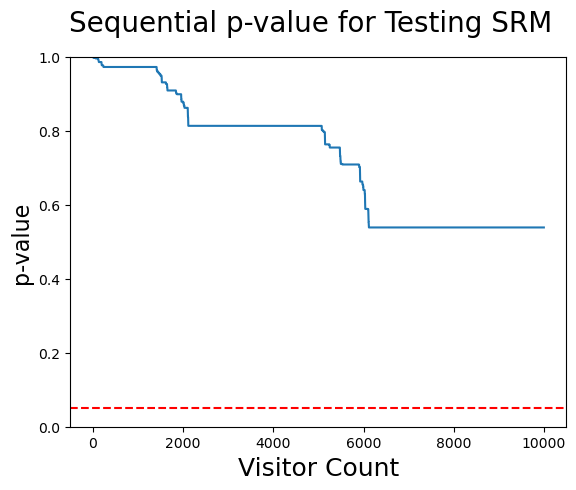

The p-value never goes below 0.05 in the given data.


In [4]:
test = SRM_Test()
test.srm_test(a, 'T', 3)

In [5]:
file_path2 = r'C:\Users\General\Desktop\CAPSTONE\Datasets'
# C:\Users\General\Desktop\MSc Data Science\CAPSTONE\Datasets

a_1 = pd.read_csv(file_path2 + '\\test1.csv')
a_2 = pd.read_csv(file_path2 + '\\test2.csv')
a_3 = pd.read_csv(file_path2 + '\\test3.csv')

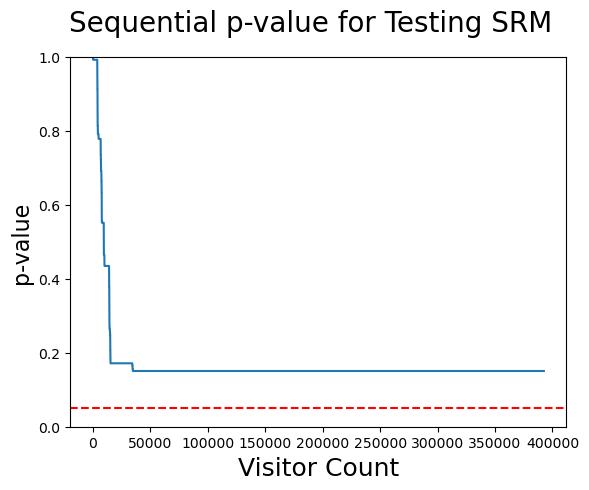

The p-value never goes below 0.05 in the given data.


In [6]:
test.srm_test(a_1, 'VARIANT', 3)

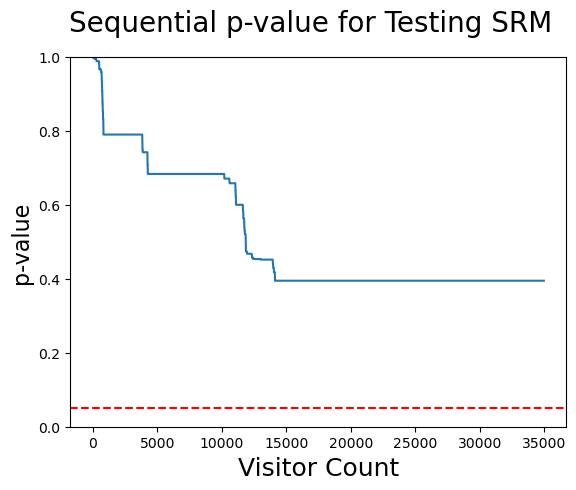

The p-value never goes below 0.05 in the given data.


In [7]:
test.srm_test(a_2, 'VARIANT', 2)

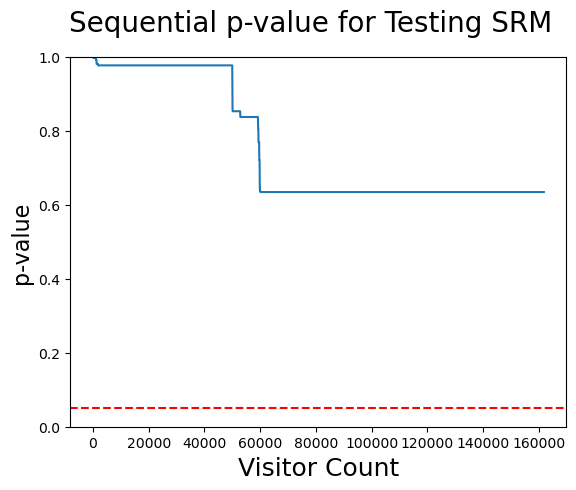

The p-value never goes below 0.05 in the given data.


In [8]:
test.srm_test(a_3, 'VARIANT', 2)